# Выбор месторождения для бурения новой скважины

Мне предоставлены пробы нефти в трёх регионах, где измерили качество нефти и объём её запасов. Необходимо посторить модель, которая поможет определить наиболее прибыльный регион с наименьшими рисками.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats as st

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

### Изучение и ознакомление с данными

In [2]:
geo0 = pd.read_csv('C:\\Users\\yansa\\YP_Projects\\YP_DataSets\\SP7\\geo_data_0.csv')
geo1 = pd.read_csv('C:\\Users\\yansa\\YP_Projects\\YP_DataSets\\SP7\\geo_data_1.csv')
geo2 = pd.read_csv('C:\\Users\\yansa\\YP_Projects\\YP_DataSets\\SP7\\geo_data_2.csv')

In [3]:
print('Geo region 0')
display(geo0.head())
print('Geo region 1')
display(geo1.head())
print('Geo region 2')
display(geo2.head())

Geo region 0


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Geo region 1


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Geo region 2


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Подготовлю датафрейм для визуализации.

In [4]:
geo_boxplot = geo0.drop('id', axis=1).rename(columns={'f0':'Geo_0 f0', 'f1':'Geo_0 f1', 
                                                      'f2':'Geo_0 f2', 'product':'Geo_0 product'})
geo_boxplot = geo_boxplot.join(geo1.drop('id', axis=1).rename(columns={'f0':'Geo_1 f0', 'f1':'Geo_1 f1', 
                                                      'f2':'Geo_1 f2', 'product':'Geo_1 product'}))
geo_boxplot = geo_boxplot.join(geo2.drop('id', axis=1).rename(columns={'f0':'Geo_2 f0', 'f1':'Geo_2 f1', 
                                                      'f2':'Geo_2 f2', 'product':'Geo_2 product'}))
geo_boxplot.head()

,Geo_0 f0,Geo_0 f1,Geo_0 f2,Geo_0 product,Geo_1 f0,Geo_1 f1,Geo_1 f2,Geo_1 product,Geo_2 f0,Geo_2 f1,Geo_2 f2,Geo_2 product
0,0.705745,-0.497823,1.221170,105.280062,-15.001348,-8.276000,-0.005876,3.179103,-1.146987,0.963328,-0.828965,27.758673
1,1.334711,-0.340164,4.365080,73.037750,14.272088,-3.475083,0.999183,26.953261,0.262778,0.269839,-2.530187,56.069697
2,1.022732,0.151990,1.419926,85.265647,6.263187,-5.948386,5.001160,134.766305,0.194587,0.289035,-5.586433,62.871910
3,-0.032172,0.139033,2.978566,168.620776,-13.081196,-11.506057,4.999415,137.945408,2.236060,-0.553760,0.930038,114.572842
4,1.988431,0.155413,4.751769,154.036647,12.702195,-8.147433,5.004363,134.766305,-0.515993,1.716266,5.899011,149.600746


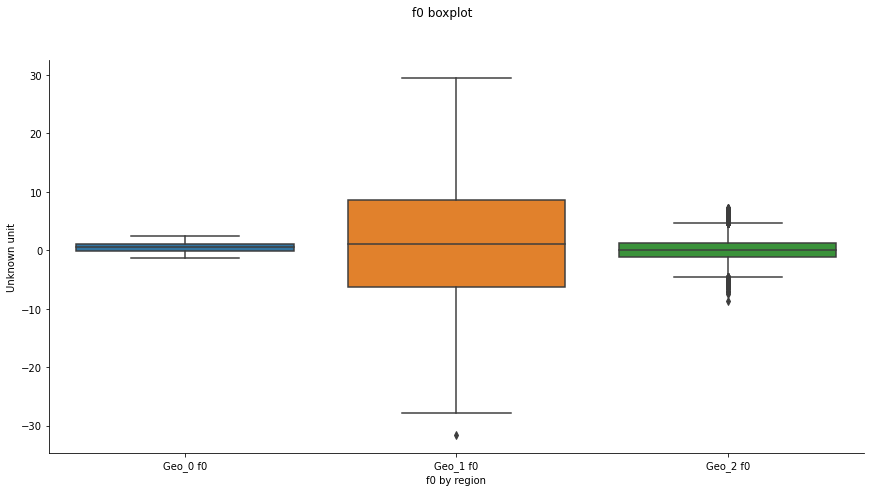

In [5]:
plot = sns.catplot(data=geo_boxplot[['Geo_0 f0', 'Geo_1 f0', 'Geo_2 f0']], kind='box', height=6,
                    aspect=2, legend_out=False)
plot.set_axis_labels(x_var='f0 by region', y_var='Unknown unit')
plot.set
plot.fig.suptitle('f0 boxplot', y=1.1);

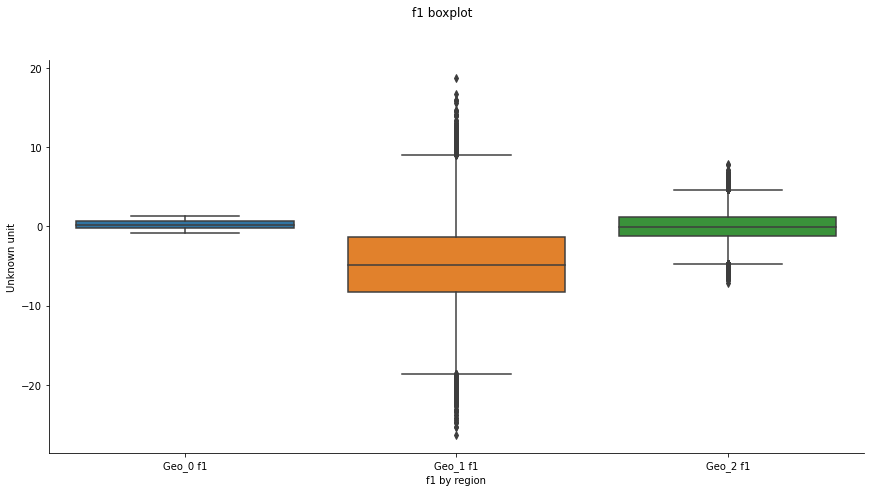

In [6]:
plot = sns.catplot(data=geo_boxplot[['Geo_0 f1', 'Geo_1 f1', 'Geo_2 f1']], kind='box', height=6,
                    aspect=2, legend_out=False)
plot.set_axis_labels(x_var='f1 by region', y_var='Unknown unit')
plot.set
plot.fig.suptitle('f1 boxplot', y=1.1);

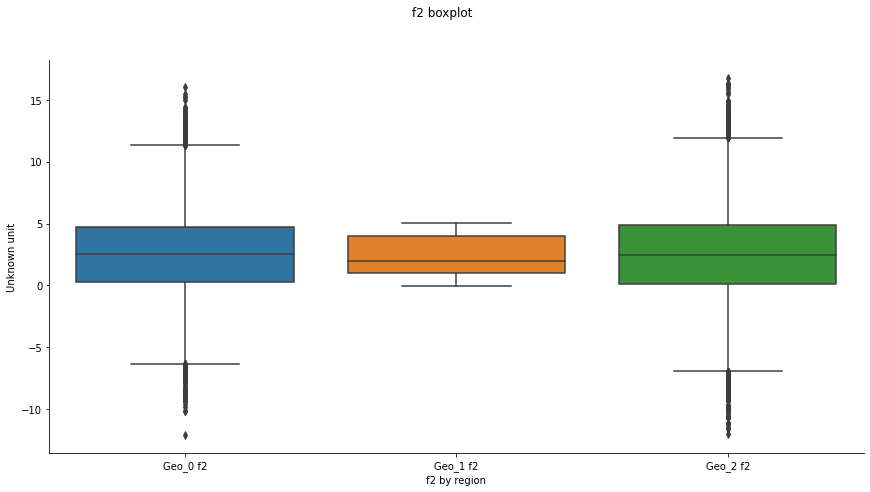

In [7]:
plot = sns.catplot(data=geo_boxplot[['Geo_0 f2', 'Geo_1 f2', 'Geo_2 f2']], kind='box', height=6,
                    aspect=2, legend_out=False)
plot.set_axis_labels(x_var='f2 by region', y_var='Unknown unit')
plot.set
plot.fig.suptitle('f2 boxplot', y=1.1);

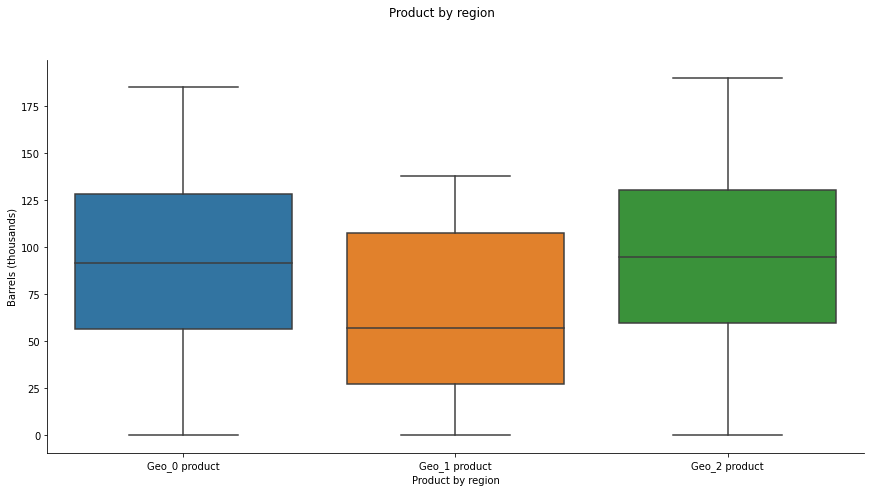

In [8]:
plot = sns.catplot(data=geo_boxplot[['Geo_0 product', 'Geo_1 product', 'Geo_2 product']], kind='box', height=6,
                    aspect=2, legend_out=False)
plot.set_axis_labels(x_var='Product by region', y_var='Barrels (thousands)')
plot.set
plot.fig.suptitle('Product by region', y=1.1);

In [9]:
print('Geo region 0')
display(geo0.dtypes)
print('Geo region 1')
display(geo1.dtypes)
print('Geo region 2')
display(geo2.dtypes)

Geo region 0


id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

Geo region 1


id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

Geo region 2


id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

Все типы данных приведены и готовы к обучению.

In [10]:
print('Geo region 0')
display(geo0.nunique())
print('Geo region 1')
display(geo1.nunique())
print('Geo region 2')
display(geo2.nunique())

Geo region 0


id          99990
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

Geo region 1


id          99996
f0         100000
f1         100000
f2         100000
product        12
dtype: int64

Geo region 2


id          99996
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

В данных присутствуют повторяющиеся id, что странно, тк каждый id должен отображать уникальное месторождение. Удалю дублирующиеся id:

In [11]:
geo0 = geo0.drop_duplicates(subset='id', keep=False).reset_index(drop=True)
geo1 = geo1.drop_duplicates(subset='id', keep=False).reset_index(drop=True)
geo2 = geo2.drop_duplicates(subset='id', keep=False).reset_index(drop=True)

Проверяем:

In [12]:
print('Geo region 0')
display(geo0.nunique())
print('Geo region 1')
display(geo1.nunique())
print('Geo region 2')
display(geo2.nunique())

Geo region 0


id         99980
f0         99980
f1         99980
f2         99980
product    99980
dtype: int64

Geo region 1


id         99992
f0         99992
f1         99992
f2         99992
product       12
dtype: int64

Geo region 2


id         99992
f0         99992
f1         99992
f2         99992
product    99992
dtype: int64

### Обучу и проверю модель для каждого региона

Разобью данные на 2 датасета: 1ый с параметрами, по которым предсказываем, 2ой с предсказываемым параметром.

In [13]:
x_geo0 = geo0.drop(['id','product'], axis=1)
y_geo0 = geo0['product']
x_geo1 = geo1.drop(['id','product'], axis=1)
y_geo1 = geo1['product']
x_geo2 = geo2.drop(['id','product'], axis=1)
y_geo2 = geo2['product']

Разделю датасеты на обучающую и тестовую выборку (бью на две части вместо трех, тк в дальнейшем планирую подбор параметров с помощью кроссвалидации).

In [14]:
x_geo0_train, x_geo0_test, y_geo0_train, y_geo0_test = train_test_split(x_geo0, y_geo0, random_state=12345)
display((x_geo0_train.shape, x_geo0_test.shape, y_geo0_train.shape, y_geo0_test.shape))

x_geo1_train, x_geo1_test, y_geo1_train, y_geo1_test = train_test_split(x_geo1, y_geo1, random_state=12345)
display((x_geo1_train.shape, x_geo1_test.shape, y_geo1_train.shape, y_geo1_test.shape))

x_geo2_train, x_geo2_test, y_geo2_train, y_geo2_test = train_test_split(x_geo2, y_geo2, random_state=12345)
display((x_geo2_train.shape, x_geo2_test.shape, y_geo2_train.shape, y_geo2_test.shape))

((74985, 3), (24995, 3), (74985,), (24995,))

((74994, 3), (24998, 3), (74994,), (24998,))

((74994, 3), (24998, 3), (74994,), (24998,))

### Обучение моделей

In [15]:
clf = LinearRegression()

Поищем лучшие гиперпараметры:

In [16]:
params = {'fit_intercept' : [True, False], 'normalize' : [True, False]}

In [17]:
clf_gs_geo0 = GridSearchCV(clf, params, cv=5, verbose=1)
clf_gs_geo1 = GridSearchCV(clf, params, cv=5, verbose=1)
clf_gs_geo2 = GridSearchCV(clf, params, cv=5, verbose=1)

In [18]:
clf_gs_geo0.fit(x_geo0_train, y_geo0_train)
clf_gs_geo1.fit(x_geo1_train, y_geo1_train)
clf_gs_geo2.fit(x_geo2_train, y_geo2_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             verbose=1)

In [19]:
prediction_geo0 = clf_gs_geo0.predict(x_geo0_test)
prediction_geo1 = clf_gs_geo1.predict(x_geo1_test)
prediction_geo2 = clf_gs_geo2.predict(x_geo2_test)
prediction_geo0

array([ 62.28661337,  70.42817752,  87.34956247, ...,  95.05743312,
        78.94454642, 115.48299868])

Предскажем результаты по тестовым данным и соберем реальные данные и предсказанные в один датафрейм:

In [20]:
region_list = ['geo0', 'geo1', 'geo2']

In [21]:
for i in range(len(region_list)):
    globals()[region_list[i]+'_results'] = pd.DataFrame({
        'real':globals()['y_'+region_list[i]+'_test'].reset_index(drop=True), 
        'predicted':pd.Series(globals()['prediction_'+region_list[i]])})
    globals()[region_list[i]+'_results']['difference'] = (globals()[region_list[i]+'_results']['real'] -
        globals()[region_list[i]+'_results']['predicted'])
    print(region_list[i]+'_results')
    display(globals()[region_list[i]+'_results'].head())

geo0_results


,real,predicted,difference
0,61.171722,62.286613,-1.114891
1,94.192535,70.428178,23.764358
2,137.742601,87.349562,50.393039
3,10.936404,26.782932,-15.846527
4,49.611033,34.554999,15.056034


geo1_results


,real,predicted,difference
0,57.085625,55.971735,1.113890
1,57.085625,54.633633,2.451992
2,53.906522,54.674833,-0.768311
3,134.766305,133.810938,0.955367
4,84.038886,85.478312,-1.439426


geo2_results


,real,predicted,difference
0,37.147754,42.989028,-5.841274
1,55.498481,95.462292,-39.963810
2,60.024016,109.408090,-49.384075
3,33.638710,144.760222,-111.121512
4,109.242324,103.116807,6.125517


In [22]:
for i in range(len(region_list)):
    globals()['mse_'+region_list[i]] = mean_squared_error(globals()[region_list[i]+'_results']['real'], 
                                                          globals()[region_list[i]+'_results']['predicted'])
    globals()['rmse_'+region_list[i]] = globals()['mse_'+region_list[i]]**0.5
    globals()['real_mean_'+region_list[i]] = globals()[region_list[i]+'_results']['real'].mean()
    globals()['pred_mean_'+region_list[i]] = globals()[region_list[i]+'_results']['predicted'].mean()
    globals()['real_product_'+region_list[i]] = globals()[region_list[i]+'_results']['real'].sum()
    globals()['pred_product_'+region_list[i]] = globals()[region_list[i]+'_results']['predicted'].sum()
    
    print(f'Region = {region_list[i]}')
    print()
    print('RMSE =', globals()['rmse_'+region_list[i]].round(2))
    print('Real mean =', globals()['real_mean_'+region_list[i]].round(2))
    print('Predicted mean =', globals()['pred_mean_'+region_list[i]].round(2))
    print('Real total product =', globals()['real_product_'+region_list[i]].round(0))
    print('Predicted total product =', globals()['pred_product_'+region_list[i]].round(0))

    print()

Region = geo0

RMSE = 37.72
Real mean = 92.39
Predicted mean = 92.42
Real total product = 2309375.0
Predicted total product = 2310134.0

Region = geo1

RMSE = 0.89
Real mean = 68.98
Predicted mean = 68.98
Real total product = 1724371.0
Predicted total product = 1724440.0

Region = geo2

RMSE = 39.98
Real mean = 94.55
Predicted mean = 95.12
Real total product = 2363506.0
Predicted total product = 2377715.0



### Анализ результатов по 3 регионам

In [23]:
all_regions_results = pd.DataFrame({
    'Region' : ['geo0', 'geo1', 'geo2'], 'RMSE' : [rmse_geo0, rmse_geo1, rmse_geo2],
    'Real mean' : [real_mean_geo0, real_mean_geo1, real_mean_geo2],
    'Predicted mean' : [pred_mean_geo0, pred_mean_geo1, pred_mean_geo2],
    'Real total product' : [real_product_geo0, real_product_geo1, real_product_geo2],
    'Predicted total product' : [pred_product_geo0, pred_product_geo1, pred_product_geo2]
}).round(2)

In [24]:
all_regions_results

,Region,RMSE,Real mean,Predicted mean,Real total product,Predicted total product
0,geo0,37.72,92.39,92.42,2309375.27,2310133.91
1,geo1,0.89,68.98,68.98,1724371.37,1724440.00
2,geo2,39.98,94.55,95.12,2363506.35,2377715.34


По всем трем регионам модель довольно точно предсказывает общий объем запасов в скважине, и среднее предсказываемое значение очень близко к реальному. Подозрительно низкий результат RMSE у региона geo1 и 100% попадание со средним значением. В предыдущих шагах также было замечено, что в регионе geo0 всего 12 уникальных значений product, думаю что именно с этим и связана такая точность предсказаний.

### Подготовлю данные к расчёту прибыли

Добавим переменные для дальнейших расчетов:

In [25]:
product_breakeven_ttl = 10000000/450
product_breakeven_each = product_breakeven_ttl/200
profit_per_product_mln = 0.45
budget_mln = 10000
geo0_mean = geo0['product'].mean()
geo1_mean = geo1['product'].mean()
geo2_mean = geo2['product'].mean()

In [26]:
print(f'Общий объём сырья для безубыточной разработки = {product_breakeven_ttl:.2f} тысяч баррелей',
      f'Объём сырья для безубыточной разработки одного месторождения = {product_breakeven_each:.2f} тысяч баррелей',
      f'Средний объём сырья месторождения в регионе geo0 = {geo0_mean:.2f} тысяч баррелей',
      f'Средний объём сырья месторождения в регионе geo1 = {geo1_mean:.2f} тысяч баррелей',
      f'Средний объём сырья месторождения в регионе geo2 = {geo2_mean:.2f} тысяч баррелей',
     sep='\n')

Общий объём сырья для безубыточной разработки = 22222.22 тысяч баррелей
Объём сырья для безубыточной разработки одного месторождения = 111.11 тысяч баррелей
Средний объём сырья месторождения в регионе geo0 = 92.50 тысяч баррелей
Средний объём сырья месторождения в регионе geo1 = 68.82 тысяч баррелей
Средний объём сырья месторождения в регионе geo2 = 95.00 тысяч баррелей


Средний объём сырья одного месторождения во всех регионах ниже, чем точка безубыточности по одной скважине. В регионах geo0 и geo2 запас средней скважины на 16% ниже необходимого, а geo1 на все 39%.

### Соберу датафрейм с предсказанными и реальными значениями

In [27]:
geo0_results['real_profit_mln'] = geo0_results['real']*profit_per_product_mln
geo0_results['pred_profit_mln'] = geo0_results['predicted']*profit_per_product_mln
geo1_results['real_profit_mln'] = geo1_results['real']*profit_per_product_mln
geo1_results['pred_profit_mln'] = geo1_results['predicted']*profit_per_product_mln
geo2_results['real_profit_mln'] = geo2_results['real']*profit_per_product_mln
geo2_results['pred_profit_mln'] = geo2_results['predicted']*profit_per_product_mln

In [28]:
display(geo0_results.head())
display(geo1_results.head())
display(geo2_results.head())

,real,predicted,difference,real_profit_mln,pred_profit_mln
0,61.171722,62.286613,-1.114891,27.527275,28.028976
1,94.192535,70.428178,23.764358,42.386641,31.692680
2,137.742601,87.349562,50.393039,61.984171,39.307303
3,10.936404,26.782932,-15.846527,4.921382,12.052319
4,49.611033,34.554999,15.056034,22.324965,15.549750


,real,predicted,difference,real_profit_mln,pred_profit_mln
0,57.085625,55.971735,1.113890,25.688531,25.187281
1,57.085625,54.633633,2.451992,25.688531,24.585135
2,53.906522,54.674833,-0.768311,24.257935,24.603675
3,134.766305,133.810938,0.955367,60.644837,60.214922
4,84.038886,85.478312,-1.439426,37.817499,38.465240


,real,predicted,difference,real_profit_mln,pred_profit_mln
0,37.147754,42.989028,-5.841274,16.716490,19.345063
1,55.498481,95.462292,-39.963810,24.974317,42.958031
2,60.024016,109.408090,-49.384075,27.010807,49.233641
3,33.638710,144.760222,-111.121512,15.137419,65.142100
4,109.242324,103.116807,6.125517,49.159046,46.402563


In [29]:
geo0_top200 = geo0_results.sort_values('predicted', ascending=False)[:200]
geo1_top200 = geo1_results.sort_values('predicted', ascending=False)[:200]
geo2_top200 = geo2_results.sort_values('predicted', ascending=False)[:200]

In [30]:
profit0 = pd.DataFrame(geo0_top200.drop(['difference'], axis=1).sum()).transpose().rename(index={0: 'geo0'})
profit1 = pd.DataFrame(geo1_top200.drop(['difference'], axis=1).sum()).transpose().rename(index={0: 'geo1'})
profit2 = pd.DataFrame(geo2_top200.drop(['difference'], axis=1).sum()).transpose().rename(index={0: 'geo2'})
profit_all_regions = pd.concat([profit0, profit1, profit2])
profit_all_regions['real_profit_mln'] = profit_all_regions['real_profit_mln'] - budget_mln
profit_all_regions['pred_profit_mln'] = profit_all_regions['pred_profit_mln'] - budget_mln
profit_all_regions.round(2)

,real,predicted,real_profit_mln,pred_profit_mln
geo0,29191.17,30804.35,3136.03,3861.96
geo1,27589.08,27744.67,2415.09,2485.10
geo2,27702.10,29988.98,2465.95,3495.04


По всем трем регионам предсказанная прибыль больше, чем реальная на 23%, 3% и 42% соответственно. Модель geo1 близка к реальности, а вот модели по geo0 и geo2 слишком оптимистичны.

### Готовлю функцию для расчета прибыли:

In [31]:
def profit(df, quantity):
    return df.sort_values('pred_profit_mln', ascending=False)[:quantity]['real_profit_mln'].sum() - budget_mln

Проверяем:

In [32]:
profit(geo1_top200, 200)

2415.0866966815083

### Посчитаю риски и прибыль для каждого региона

#### Bootstrap

In [33]:
state = np.random.RandomState(12345)
values0 = []
for i in range(1000):
    subsample = geo0_results.sample(n=500, random_state=state, replace=True)
    values0.append(profit(subsample, 200))

In [34]:
state = np.random.RandomState(12345)
values1 = []
for i in range(1000):
    subsample = geo1_results.sample(n=500, random_state=state, replace=True)
    values1.append(profit(subsample, 200))

In [35]:
state = np.random.RandomState(12345)
values2 = []
for i in range(1000):
    subsample = geo2_results.sample(n=500, random_state=state, replace=True)
    values2.append(profit(subsample, 200))

In [36]:
values0, values1, values2 = pd.Series(values0), pd.Series(values1), pd.Series(values2)

Гистограмма распределения прибыли с 1000 выборок с региона geo0


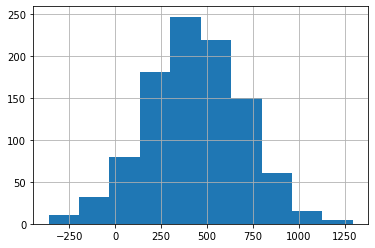

In [37]:
print('Гистограмма распределения прибыли с 1000 выборок с региона geo0')
values0.hist();

Гистограмма распределения прибыли с 1000 выборок с региона geo1


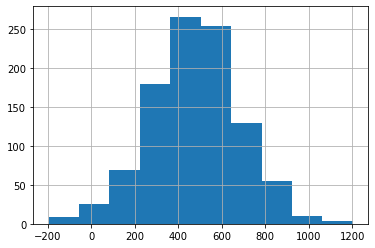

In [38]:
print('Гистограмма распределения прибыли с 1000 выборок с региона geo1')
values1.hist();

Гистограмма распределения прибыли с 1000 выборок с региона geo2


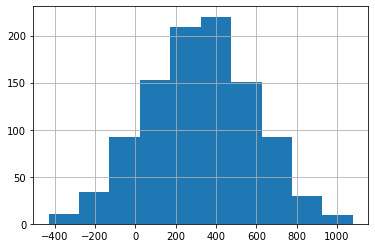

In [39]:
print('Гистограмма распределения прибыли с 1000 выборок с региона geo2')
values2.hist();

In [40]:
for i in range(0,3):
    globals()['mean_profit'+str(i)] = globals()['values'+str(i)].mean()
    globals()['confidence_interval'+str(i)] = st.t.interval(alpha = 0.95, df=len(globals()['values'+str(i)])-1, 
                                                            loc=globals()['mean_profit'+str(i)], 
                                                            scale=values0.sem())
    globals()['risk'+str(i)] = globals()['values'+str(i)][globals()['values'+str(i)] < 0].count() / \
        globals()['values'+str(i)].count()
    
    print(f'Регион geo{i}')
    print()
    print('Средняя прибыль =', globals()['mean_profit'+str(i)].round(2))
    print('95% доверительный интервал = от', globals()['confidence_interval'+str(i)][0].round(2),
         'до', globals()['confidence_interval'+str(i)][1].round(2))
    print('Риск убытков =', globals()['risk'+str(i)]*100, '%')
    print()

Регион geo0

Средняя прибыль = 431.54
95% доверительный интервал = от 415.18 до 447.9
Риск убытков = 5.5 %

Регион geo1

Средняя прибыль = 477.95
95% доверительный интервал = от 461.59 до 494.31
Риск убытков = 2.0 %

Регион geo2

Средняя прибыль = 322.15
95% доверительный интервал = от 305.79 до 338.51
Риск убытков = 12.3 %



In [41]:
bootstrap_results = pd.DataFrame({
    'Region' : ['geo0', 'geo1', 'geo2'], 'Mean profit' : [mean_profit0, mean_profit1, mean_profit2],
    'Conf interval start' : [confidence_interval0[0], confidence_interval1[0], confidence_interval2[0]],
    'Conf interval end' : [confidence_interval0[1], confidence_interval1[1], confidence_interval2[1]],
    'Risk%' : [risk0*100, risk1*100, risk2*100]
})
bootstrap_results.round(2)

,Region,Mean profit,Conf interval start,Conf interval end,Risk%
0,geo0,431.54,415.18,447.90,5.5
1,geo1,477.95,461.59,494.31,2.0
2,geo2,322.15,305.79,338.51,12.3


## Вывод

По всем трем регионам модель довольно точно предсказывает общий объем запасов в скважине, и среднее предсказываемое значение очень близко к реальному. 

Наибольшую точность показала модель обученная на регионе geo1:

In [42]:
all_regions_results

,Region,RMSE,Real mean,Predicted mean,Real total product,Predicted total product
0,geo0,37.72,92.39,92.42,2309375.27,2310133.91
1,geo1,0.89,68.98,68.98,1724371.37,1724440.00
2,geo2,39.98,94.55,95.12,2363506.35,2377715.34


По всем трем регионам предсказанная прибыль больше, чем реальная на 23%, 3% и 42% соответственно. Модель geo1 близка к реальности, а вот модели по geo0 и geo2 слишком оптимистичны.

In [43]:
profit_all_regions.round(2)

,real,predicted,real_profit_mln,pred_profit_mln
geo0,29191.17,30804.35,3136.03,3861.96
geo1,27589.08,27744.67,2415.09,2485.10
geo2,27702.10,29988.98,2465.95,3495.04


По итогам применения метода Bootstrap, регион geo1 оказался наименее рискованным.

In [44]:
bootstrap_results.round(2)

,Region,Mean profit,Conf interval start,Conf interval end,Risk%
0,geo0,431.54,415.18,447.90,5.5
1,geo1,477.95,461.59,494.31,2.0
2,geo2,322.15,305.79,338.51,12.3


В связи с вышеизолженным: оказалось что модель рассчитывает запасы в регионе geo0 и geo2 чересчур оптимистично, и в реальности показатели прибыли с большей вероятностью уйдут в убыток. В то время как в регионе geo1 модель ведет себя гораздо точнее и стабильнее, средняя прибыль выше и вероятность убытков меньше. В качестве региона для разработки скважин предлагаю регион geo1.